In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
#this is just to get an idea on the data type for Mesurement, instead of INSPECTING by importing inspector
#prcp = float, station= string, id =int, date= string, tobs =float
measurement_row = session.query(Measurement).first()
measurement_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20a33d6f580>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [10]:
#id = int, station= string, latitude= float, elevation = float, name= string, longitude= float
station_row =session.query(Station).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20a33d3ca30>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

#result = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%Y", Measurement.date) == "2016").distinct().all()
#result
try_2= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
order_by(Measurement.date).distinct().all()
try_2

#recent_prcp = session.query(Measurement.date, Measurement.prcp)\
 #   .filter(Measurement.date > '2016-08-22')\
  #  .filter(Measurement.date <= '2017-08-23')\
   # .order_by(Measurement.date).distinct().all()
#recent_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', None)

In [13]:
# Perform a query to retrieve the data and precipitation scores

#session.query(Measurement.prcp).filter(Measurement.date).all()
for row in session.query(Measurement.date, Measurement.prcp).distinct().all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(try_2 , columns = ["Date", "Precipitation"]).dropna()

In [15]:

# Sort the dataframe by date
precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
1545,2017-08-22,0.00
1546,2017-08-22,0.50
1547,2017-08-23,0.00
1548,2017-08-23,0.08


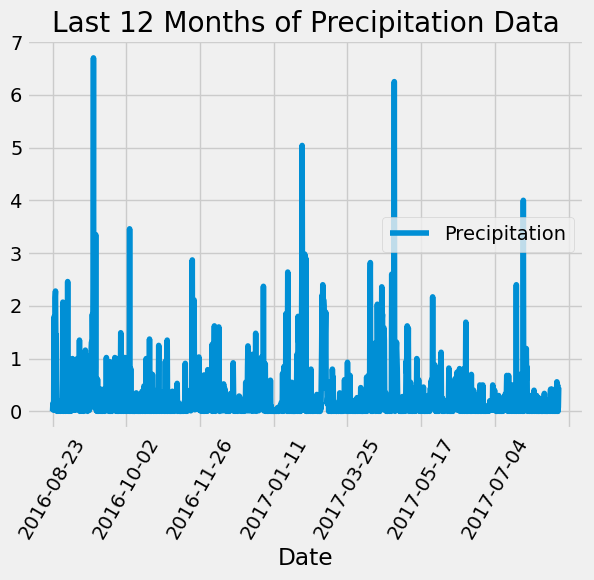

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x = "Date", y = "Precipitation",  title = "Last 12 Months of Precipitation Data", rot = 60)
#saving an image
plt.savefig("../PrecipitationTemps.png")

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,1374.000000
mean,0.256412
std,0.538142
min,0.000000
25%,0.010000
50%,0.060000
75%,0.250000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).group_by(Measurement.station).count()
total_stations

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#active_station = session.query(Station.station, func.count(Station.id))\
 #   .group_by(Station.station)\
  #  .order_by(func.count(Station.id).desc()).all()
#active_station
active_station = session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station)\
  .order_by(func.count(Measurement.id).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#min_max_avg = session.query(func.min(active_station(Measurement.tobs)), func.max(active_station(Measurement.tobs)), func.avg(active_station(Measurement.tobs))).distinct().all()

#min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).distinct().all()
#session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
 #               .filter(Measurement.station == )\
  #              .all()
if active_station:
    station_id, station_count = active_station[0]

    temp_stats = session.query(func.min(Measurement.tobs),
                                func.max(Measurement.tobs),
                                func.avg(Measurement.tobs))\
                        .filter(Measurement.station == station_id)\
                        .all()

    if temp_stats:
        tmin, tmax, tavg = temp_stats[0]
        print(temp_stats)


[(54.0, 85.0, 71.66378066378067)]


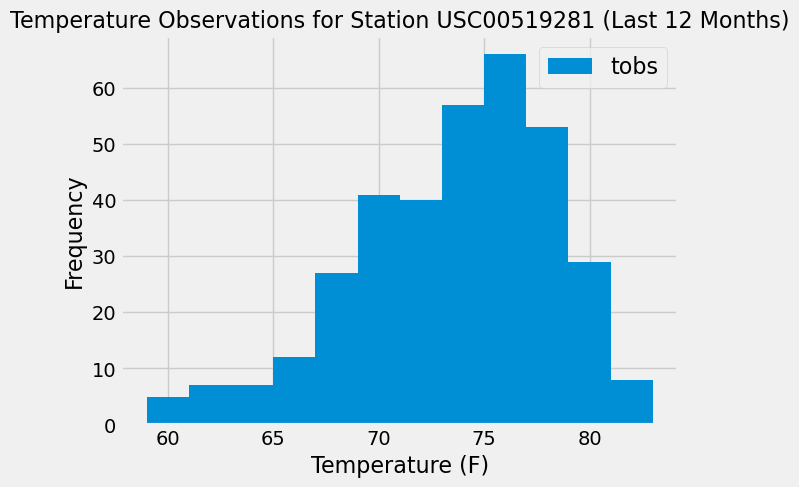

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
try_2_tobs= session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.station == 'USC00519281').\
order_by(Measurement.date).distinct().all()

#temperature_df = pd.DataFrame(try_2_tobs , columns = ["Date", "tobs"]).dropna()
#temperature_df
#temperature_df = pd.DataFrame(try_2_tobs, columns = ["Date", "Tobs"])
#temperature_df.head()
#temperature_df.plot.hist(bins = 12, title = "Last 12 Months of Station Temperature Data")
# Create a histogram plot of temperature values
#temperature_df.plot(kind='hist', ,bins=12,)
#temperature_df.plot.hist(by='station', bins=12, figsize=(12,8))
#plt.grid()
#plt.title("Temperature Observations for Station " + active_station, fontsize=20)
#plt.xlabel("Temperature Reported", fontsize=16)
#plt.legend(bbox_to_anchor=(1,1), fontsize=16)
#plt.savefig("../StationTemps.png")
#plt.show

# Extract temperatures from the query results
#temps = [result[1] for result in try_2_tobs]
temps = []
for result in try_2_tobs:
    temps.append(result[1])

# Create histogram
plt.hist(temps, bins=12, label='tobs')

# Add x and y labels and title
plt.xlabel('Temperature (F)', fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Temperature Observations for Station USC00519281 (Last 12 Months)',fontsize=16)

# Show legend
plt.legend(bbox_to_anchor=(1,1), fontsize=16)

#saving an image
plt.savefig("../StationTemps.png")

# Show plot
plt.show()

# Close Session

In [22]:
# Close Session
session.close()